In [1]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline

In [2]:
load_dotenv()

True

In [3]:
###Set Alpaca API key and secret
alpaca_api_key = os.getenv("api_key_id")
alpaca_secret_key = os.getenv("secret_api_key")
###Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [4]:
###Set the tickers
tickers = ["NIO", "WKHS"]
###Set timeframe to '1D' for Alpaca API
timeframe = "1D"
# Set start and end datetimes 
start_date = pd.Timestamp("2018-09-30", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-01-01", tz="America/New_York").isoformat()

# Get historical data 
df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

In [5]:
df_ticker.head(10)

NIO                                  WKHS          \
                           open  high   low   close      volume  open    high   
2018-10-01 00:00:00-04:00  7.06  7.08  6.60  6.6000  15403278.0  1.15  1.1500   
2018-10-02 00:00:00-04:00  6.60  6.60  5.87  5.9232  18478084.0  1.11  1.1500   
2018-10-03 00:00:00-04:00  6.12  6.55  6.12  6.2901  12596686.0  1.15  1.1600   
2018-10-04 00:00:00-04:00  6.19  6.24  6.00  6.2200  11181644.0  1.13  1.1443   
2018-10-05 00:00:00-04:00  6.20  6.29  6.03  6.2500   7871554.0  1.09  1.1200   
2018-10-08 00:00:00-04:00  6.07  6.18  5.95  6.0600  10882436.0  1.12  1.1400   
2018-10-09 00:00:00-04:00  6.19  7.40  6.10  7.3826  28083425.0  1.15  1.1800   
2018-10-10 00:00:00-04:00  8.10  8.35  7.39  7.7500  65987956.0  1.05  1.0940   
2018-10-11 00:00:00-04:00  7.45  7.55  6.92  7.1799  21158296.0  1.03  1.0400   
2018-10-12 00:00:00-04:00  7.46  7.75  7.28  7.4400  12595572.0  1.02  1.1300   

                                                 
                            low close    volume  
2018-10-01 00:00:00-04:00  1.07  1.09  252820.0  
2018-10-02 00:00:00-04:00  1.08  1.15  260018.0  
2018-10-03 00:00:00-04:00  1.10  1.11  116932.0  
2018-10-04 00:00:00-04:00  1.07  1.07  167014.0  
2018-10-05 00:00:00-04:00  1.08  1.09   51400.0  
2018-10-08 00:00:00-04:00  1.09  1.14  177419.0  
2018-10-09 00:00:00-04:00  1.06  1.08  799093.0  
2018-10-10 00:00:00-04:00  1.01  1.03  298194.0  
2018-10-11 00:00:00-04:00  1.00  1.02  247079.0  
2018-10-12 00:00:00-04:00  1.02  1.05  253422.0

In [6]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of KO and TSLA
df_closing_prices["NIO"] = df_ticker["NIO"]["close"]
df_closing_prices["WKHS"] = df_ticker["WKHS"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Compute daily returns
df_daily_returns = df_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns.head(10)

,NIO,WKHS
2018-10-02,-0.102545,0.055046
2018-10-03,0.061943,-0.034783
2018-10-04,-0.011144,-0.036036
2018-10-05,0.004823,0.018692
2018-10-08,-0.030400,0.045872
2018-10-09,0.218251,-0.052632
2018-10-10,0.049766,-0.046296
2018-10-11,-0.073561,-0.009709
2018-10-12,0.036226,0.029412
2018-10-15,0.051075,-0.033333


In [7]:
df_daily_returns.describe()

,NIO,WKHS
count,515.000000,515.000000
mean,0.004842,0.010534
std,0.065283,0.119217
min,-0.210267,-0.239669
25%,-0.030767,-0.034669
50%,-0.000673,0.000000
75%,0.032508,0.039849
max,0.557851,2.100205


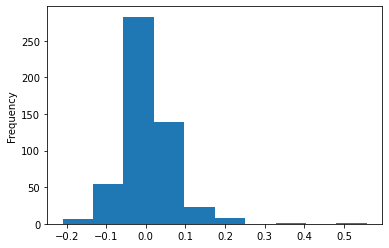

In [8]:
df_daily_returns["NIO"].plot.hist()

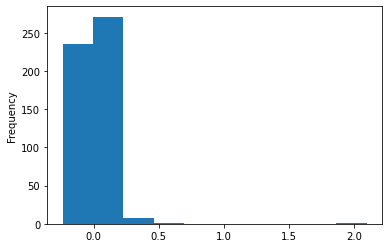

In [9]:
df_daily_returns["WKHS"].plot.hist()

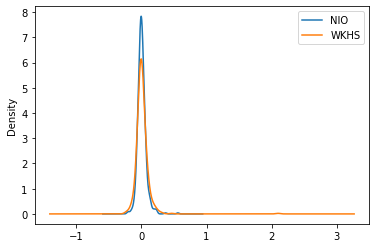

In [10]:
df_daily_returns.plot.density()

In [11]:
# Set number of simulations
num_sims = 1000

# Configure a Monte Carlo simulation to forecast three years daily returns
MC = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.66, .33],
    num_simulation = num_sims,
    num_trading_days = 252*5
)
MC.portfolio_data.head()

NIO                                               \
                           open  high   low   close      volume daily_return   
2018-10-01 00:00:00-04:00  7.06  7.08  6.60  6.6000  15403278.0          NaN   
2018-10-02 00:00:00-04:00  6.60  6.60  5.87  5.9232  18478084.0    -0.102545   
2018-10-03 00:00:00-04:00  6.12  6.55  6.12  6.2901  12596686.0     0.061943   
2018-10-04 00:00:00-04:00  6.19  6.24  6.00  6.2200  11181644.0    -0.011144   
2018-10-05 00:00:00-04:00  6.20  6.29  6.03  6.2500   7871554.0     0.004823   

                           WKHS                                             
                           open    high   low close    volume daily_return  
2018-10-01 00:00:00-04:00  1.15  1.1500  1.07  1.09  252820.0          NaN  
2018-10-02 00:00:00-04:00  1.11  1.1500  1.08  1.15  260018.0     0.055046  
2018-10-03 00:00:00-04:00  1.15  1.1600  1.10  1.11  116932.0    -0.034783  
2018-10-04 00:00:00-04:00  1.13  1.1443  1.07  1.07  167014.0    -0.036036  
2018-10-05 00:00:00-04:00  1.09  1.1200  1.08  1.09   51400.0     0.018692

In [12]:
MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.967249,1.046594,0.945063,0.812894,1.015266,0.990518,0.918385,0.999282,0.986790,1.060606,...,0.967152,1.025034,0.949485,1.002963,0.881305,0.959061,0.977930,0.999100,1.010381,0.881779
2,0.966306,1.086001,0.994381,0.781174,1.037846,1.050209,0.890323,0.969500,1.003197,1.059586,...,0.843268,0.964398,0.980737,0.941630,0.739075,1.007093,0.987697,1.017787,1.127657,0.835651
3,0.942902,1.084284,1.070519,0.719896,1.084574,1.025475,0.880550,0.891744,1.024521,1.054947,...,0.765115,0.990798,1.027221,0.901538,0.704858,1.050434,1.005607,0.960883,1.154017,0.923599
4,0.919597,1.143097,1.080767,0.722986,1.072396,1.088512,0.821058,0.907221,0.973797,1.106741,...,0.779906,1.000736,0.962319,0.936463,0.733650,0.963663,1.004957,0.846633,1.156576,0.834818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1236.703643,168.944453,348.411479,473.330961,41.718305,13704.819617,4263.464032,892.547783,110.010381,314.059899,...,41.715945,389.563251,584.583063,10033.486581,742.640136,3472.096290,418.349820,2901.944927,195.549596,645.969268
1257,1242.122199,164.954639,369.353632,445.152418,39.163801,14308.482976,4297.020266,885.264198,112.376549,316.451888,...,43.007883,405.137669,582.101609,10721.505911,720.905634,3130.209174,454.127540,2927.323624,212.823387,630.887806
1258,1163.054512,174.969960,380.138254,501.084285,39.502464,13756.570957,4133.477914,886.948281,104.587970,328.333385,...,46.568826,412.671534,588.565436,10711.746820,711.415904,3108.144846,450.745273,2977.525699,216.252852,631.700535
1259,1240.261866,188.250219,394.706490,536.315819,35.902856,14882.132588,4755.454265,841.096413,97.585217,329.194812,...,48.341536,369.877807,594.124743,10359.685655,698.550287,3042.488795,476.497391,3283.630229,219.564611,591.577076


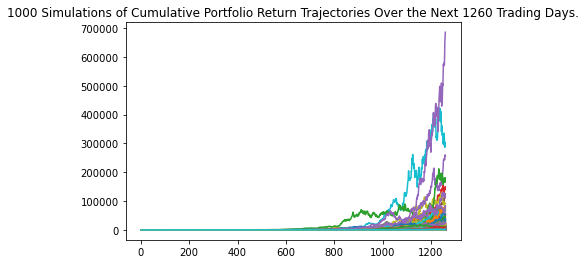

In [13]:
 # Plot simulation outcomes
line_plot = MC.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

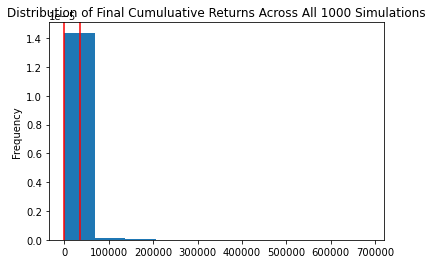

In [14]:
 # Plot probability distribution and confidence intervals
dist_plot = MC.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

In [15]:
 # Fetch summary statistics from the Monte Carlo simulation results
tbl = MC.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count             1000.000000
mean              5222.323778
std              28020.395666
min                  0.853938
25%                128.893213
50%                490.308947
75%               2014.759809
max             685367.260615
95% CI Lower        13.950216
95% CI Upper     35300.907509
Name: 1260, dtype: float64


In [17]:
 # Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $30,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30,000 in the portfolio over the next 5 years will end within in the range of $418506.49 and $1059027225.26
